# Introducción al aprendizaje automatizado - TP 1
## Autora: Aldana Zarate
### Ejercicio 1

<AxesSubplot:title={'center':'Entrenamiento longitud 3000'}, xlabel='x', ylabel='y'>

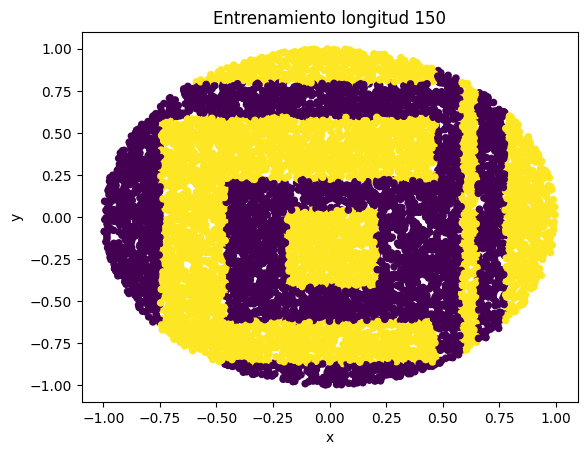

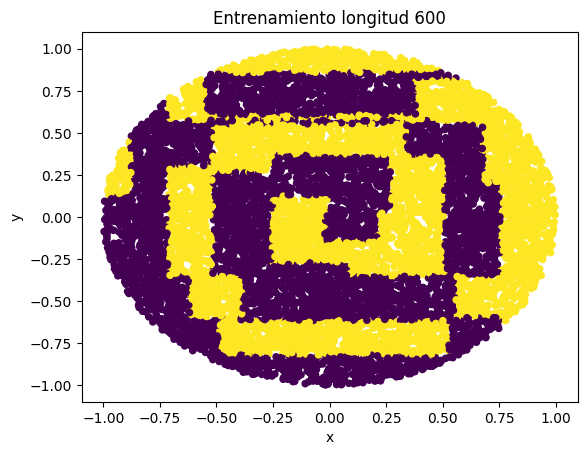

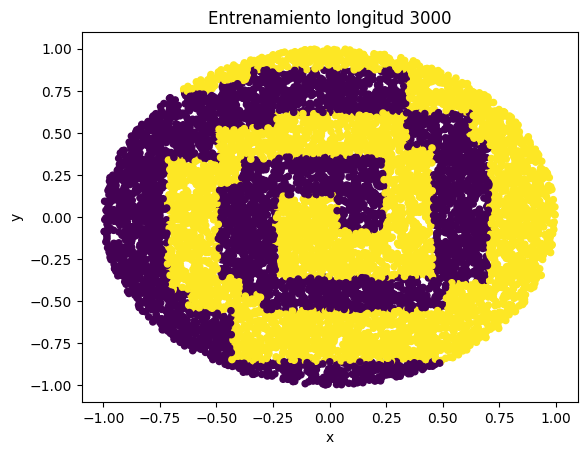

In [68]:
import tp0
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

import random
import pandas as pd
import matplotlib.pyplot as plt

######### Conjunto de test #############
s_test = tp0.generate_random_spirals(10000)
X_s_test = s_test[['x','y']]
y_s_test = s_test['Clase']

# Entrenamiento con longitud 150
random.seed()
s_150_train = tp0.generate_random_spirals(150)
X_s_150_train = s_150_train[['x','y']]
y_s_150_train = s_150_train['Clase']
clf_s_150 = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.005,random_state=0,min_samples_leaf=5)
clf_s_150.fit(X_s_150_train, y_s_150_train)
predicted_y_s_test_150 = clf_s_150.predict(s_test[['x','y']])


spirals_150 = X_s_test
spirals_150['Clase'] = predicted_y_s_test_150
dataframe_150 = pd.DataFrame(spirals_150)
dataframe_150.plot(x=0, y=1, kind='scatter', c='Clase', colormap='viridis',colorbar=False, title="Entrenamiento longitud 150")

# Entrenamiento con longitud 600
s_600_train = tp0.generate_random_spirals(600)
X_s_600_train = s_600_train[['x','y']]
y_s_600_train = s_600_train['Clase']
clf_s_600 = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.005,random_state=0,min_samples_leaf=5)
clf_s_600.fit(X_s_600_train, y_s_600_train)
predicted_y_s_test_600 = clf_s_600.predict(s_test[['x','y']])


spirals_600 = X_s_test
spirals_600['Clase'] = predicted_y_s_test_600
dataframe_600 = pd.DataFrame(spirals_600)
dataframe_600.plot(x=0, y=1, kind='scatter', c='Clase', colormap='viridis',colorbar=False, title="Entrenamiento longitud 600")

# Entrenamiento con longitud 3000
s_3000_train = tp0.generate_random_spirals(3000)
X_s_3000_train = s_3000_train[['x','y']]
y_s_3000_train = s_3000_train['Clase']
clf_s_3000 = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.005,random_state=0,min_samples_leaf=5)
clf_s_3000.fit(X_s_3000_train, y_s_3000_train)
predicted_y_s_test_3000 = clf_s_3000.predict(s_test[['x','y']])


spirals_3000 = X_s_test
spirals_3000['Clase'] = predicted_y_s_test_3000
dataframe_3000 = pd.DataFrame(spirals_3000)
dataframe_3000.plot(x=0, y=1, kind='scatter', c='Clase', colormap='viridis',colorbar=False, title="Entrenamiento longitud 3000")


Se puede observar una relación directa entre longitud de conjunto de entrenamiento y mejoría en la predicción de clases. El gráfico con conjunto de entrenamiento tamaño 150 no se asemeja en casi nada a la espiral original, la de 600 ya un poco más y la de 3000 diría que se acerca bastante.

### Ejercicio 2

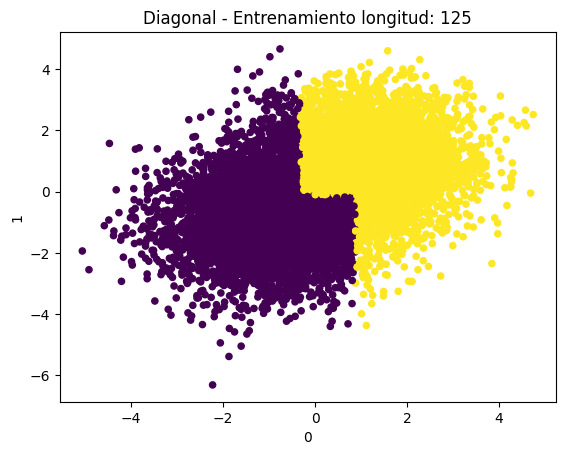

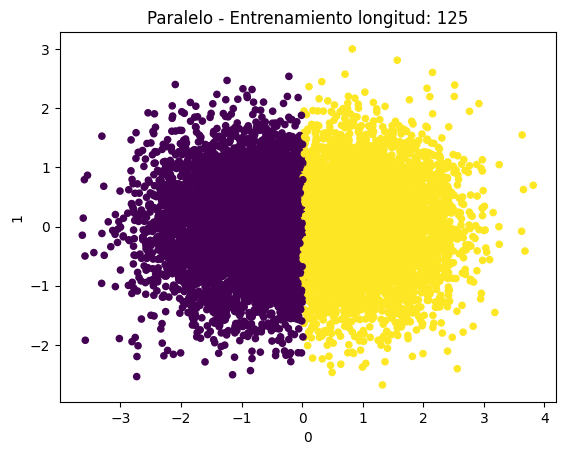

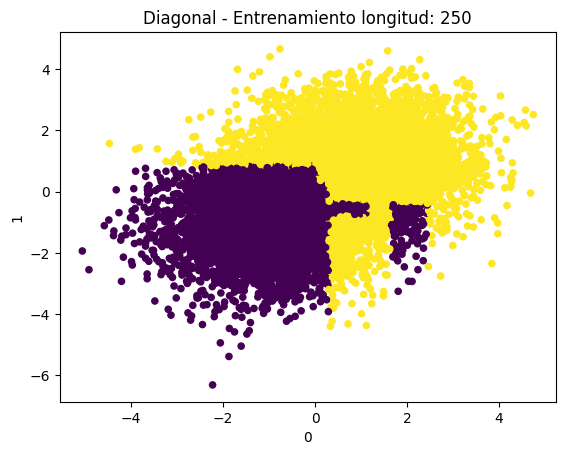

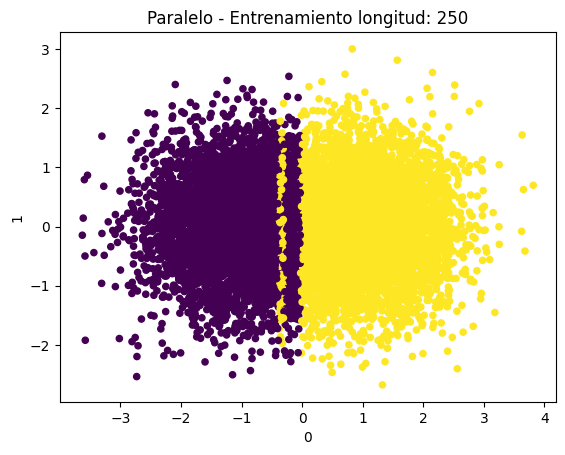

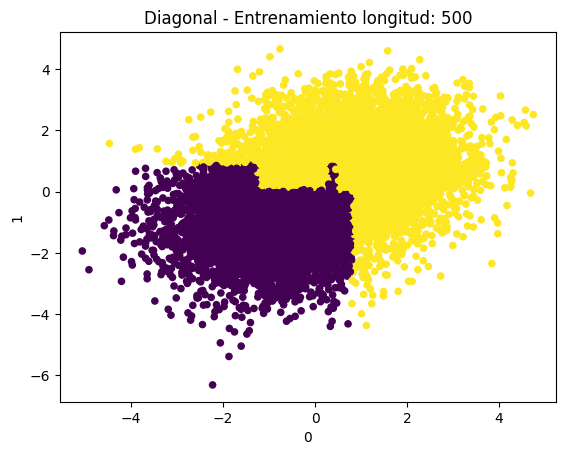

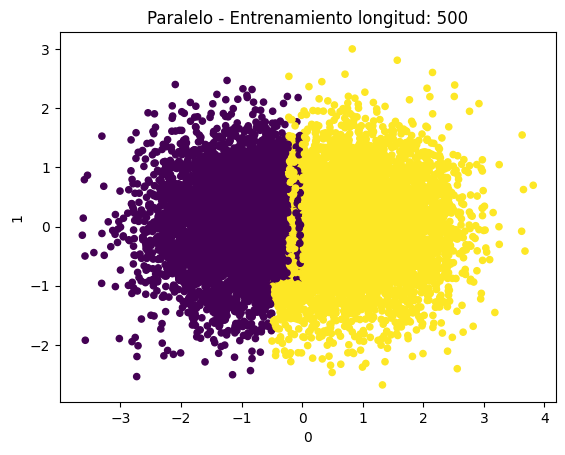

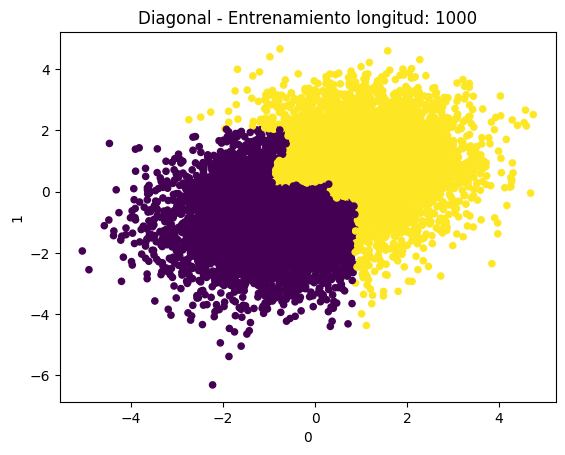

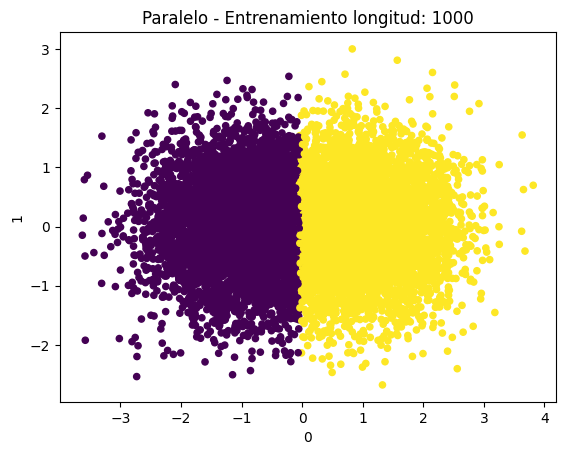

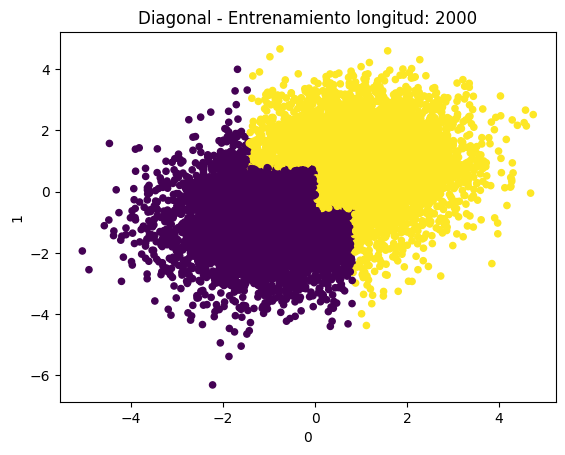

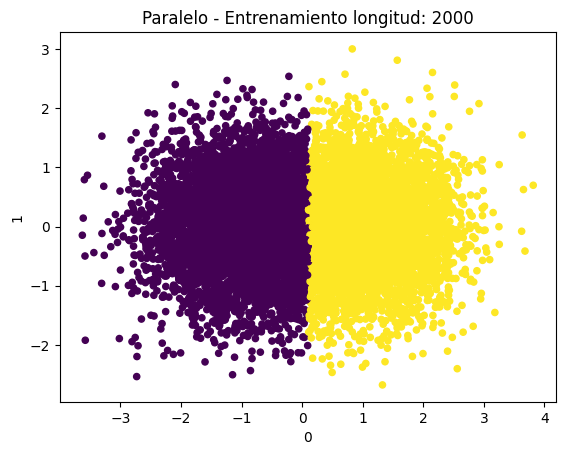

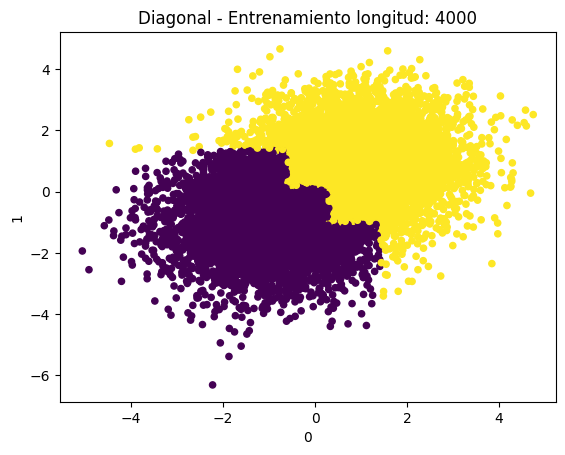

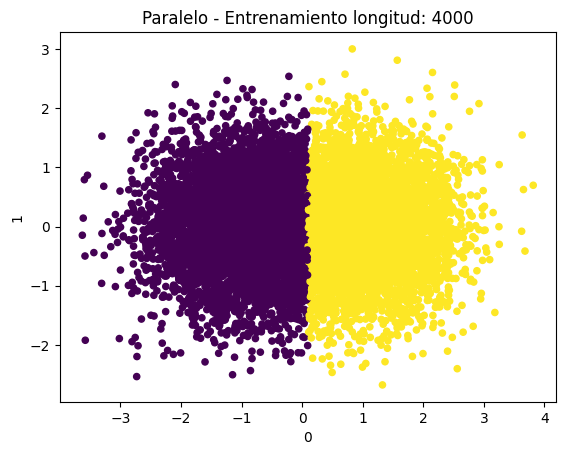

In [80]:
from sklearn.metrics import accuracy_score

# Conjuntos de test
# Diagonal
d_test = tp0.generate_dataframe_ej_a(2, 10000, 0.78)
X_d_test = d_test[[0,1]]
y_d_test = d_test['Clase']

# Paralelo
p_test = tp0.generate_dataframe_ej_b(2, 10000, 0.78)
X_p_test = p_test[[0,1]]
y_p_test = p_test['Clase']

# Valores de n
n_iterable = [125, 250, 500, 1000, 2000, 4000]

# Datos a guardar pedidos
train_errors_d = []
test_errors_d = []
tree_sizes_d = []

train_errors_p = []
test_errors_p = []
tree_sizes_p = []

# Guardo el tamaño que va teniendo n para poder armar el dataframe a la hora de analizar
train_set_size = []

for n in n_iterable:
    for i in range(0,20):
        # Longitud del conjunto de entrenamiento
        train_set_size.append(n)

        # Conjuntos de entrenamiento diagonal
        train_set_d = tp0.generate_dataframe_ej_a(2, n, 0.78)
        X_d_train = train_set_d[[0,1]]
        y_d_train = train_set_d['Clase']

        # Conjuntos de entrenamiento paralelo
        train_set_p = tp0.generate_dataframe_ej_b(2, n, 0.78)
        X_p_train = train_set_p[[0,1]]
        y_p_train = train_set_p['Clase']

        # Arboles y entrenamiento diagonal
        clf_d = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.005,random_state=0,min_samples_leaf=5)
        clf_d.fit(X_d_train, y_d_train)

        # Arboles y entrenamiento paralelo
        clf_p = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.005,random_state=0,min_samples_leaf=5)
        clf_p.fit(X_p_train, y_p_train)

        # Probamos sobre los conjuntos de testeo
        predicted_d = clf_d.predict(d_test[[0,1]])
        predicted_p = clf_p.predict(p_test[[0,1]])

        # Guardamos errores sobre el conjunto de entrenamiento y de testeo.
        # Error = 1 - accuracy
        train_errors_d.append(1 - accuracy_score(y_d_train, clf_d.predict(X_d_train)))
        test_errors_d.append(1 - accuracy_score(y_d_test, predicted_d))

        train_errors_p.append(1 - accuracy_score(y_p_train, clf_p.predict(X_p_train)))
        test_errors_p.append(1 - accuracy_score(y_p_test, predicted_p))

        # Guardamos el tamaño de los árboles
        tree_sizes_d.append(clf_d.tree_.node_count)
        tree_sizes_p.append(clf_p.tree_.node_count)

        # Graficamos en la 1er iteración a modo de ejemplo (no se si elegir así era lo esperado pero no se me ocurrió otra forma, podria haber sido
        # un random entre 0 y 19 pero no le veo el agregado en lo que se está analizando)
        if i == 0:
            diagonal = X_d_test
            diagonal['Clase'] = predicted_d
            dataframe_d = pd.DataFrame(diagonal)
            dataframe_d.plot(x=0, y=1, kind='scatter', c='Clase', colormap='viridis',colorbar=False, title=f"Diagonal - Entrenamiento longitud: {n}")

            parallel = X_p_test
            parallel['Clase'] = predicted_p
            dataframe_p = pd.DataFrame(parallel)
            dataframe_p.plot(x=0, y=1, kind='scatter', c='Clase', colormap='viridis',colorbar=False, title=f"Paralelo - Entrenamiento longitud: {n}")


Datos diagonales: a medida que va creciendo el N, salvo en el caso de n = 250, se puede observar una ligera diferencia y mejoría entre las predicciones mostradas. Cabe destacar que en este caso este incremento en la mejoría no es ni de cerca comparable con el del ejercicio de las espirales.

Datos paralelos: acá hay algo que me resulta llamativo, ya que con n = 125 se obtienen muy buenos resultados a nivel separación de las clases, pero luego en los gráficos correspondientes a n = 250 y n = 500 ya no tanto. A partir de n = 1000, se vuelve a notar esta aceptable separación entre las clases a la mitad, y, parecido al caso de las diagonales, va mejorando a medida que n crece.

#### Gráficas sobre training/test error

Text(0, 0.5, 'Error')

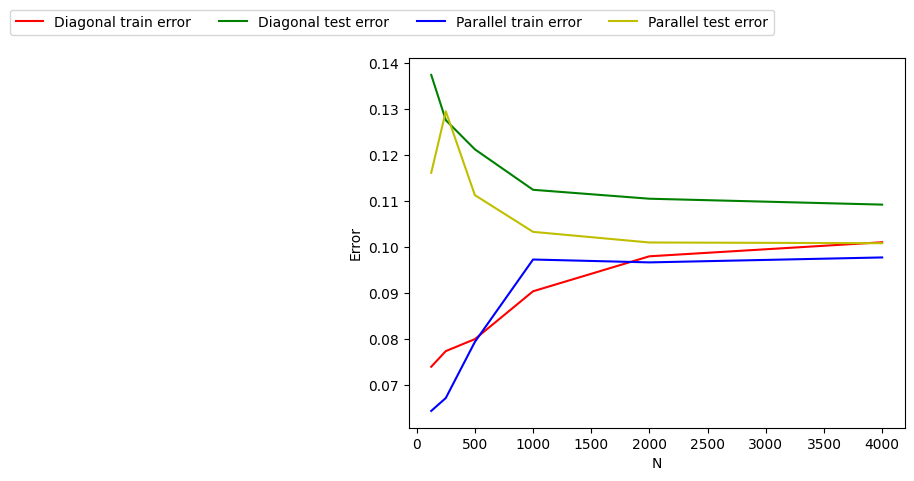

In [84]:
# Armo dataframe con los datos colectados anteriormente
temp_dataframe_d = pd.DataFrame({})
temp_dataframe_d['N'] = train_set_size
temp_dataframe_d['TrainError'] = train_errors_d
temp_dataframe_d['TestError'] = test_errors_d

temp_dataframe_p = pd.DataFrame({})
temp_dataframe_p['N'] = train_set_size
temp_dataframe_p['TrainError'] = train_errors_p
temp_dataframe_p['TestError'] = test_errors_p

# Dataframes finales a usar para la gráfica
df_errors_d = pd.DataFrame({})
df_errors_d['TrainSetSize'] = n_iterable
df_errors_d['TrainError'] = temp_dataframe_d.groupby('N')['TrainError'].mean().to_numpy()
df_errors_d['TestError'] = temp_dataframe_d.groupby('N')['TestError'].mean().to_numpy()

df_errors_p = pd.DataFrame({})
df_errors_p['TrainSetSize'] = n_iterable
df_errors_p['TrainError'] = temp_dataframe_p.groupby('N')['TrainError'].mean().to_numpy()
df_errors_p['TestError'] = temp_dataframe_p.groupby('N')['TestError'].mean().to_numpy()

plt.plot(df_errors_d['TrainSetSize'], df_errors_d['TrainError'], 'r')
plt.plot(df_errors_d['TrainSetSize'], df_errors_d['TestError'], 'g')
plt.plot(df_errors_p['TrainSetSize'], df_errors_p['TrainError'], 'b')
plt.plot(df_errors_p['TrainSetSize'], df_errors_p['TestError'], 'y')
plt.legend(['Diagonal train error', 'Diagonal test error', 'Parallel train error', 'Parallel test error'], bbox_to_anchor=(0.75, 1.15), ncol=4)
plt.xlabel("N")
plt.ylabel("Error")

Se puede observar que el error de los datos paralelos a la hora de testear fueron menores que los diagonales (salvo ese pico cuando N tiene valores intermedios como comenté en la sección anterior).
Los errores de entrenamiento de ambos datos son más o menos similares, primero tiene menores error los paralelos, luego a partir de N = 500 tiene menor los diagonales, y luego de N = 2000 (aprox) tiene menos error los paralelos nuevamente y se mantienen así de manera constante hasta N = 4000.

Además, a medida que N crece, el error de testeo decrece. Algo que sí se nota al principio cuando N es muy chico, es que el error de testing es más alto, lo que podría indicar sobreajuste. A partir de N = 1000 ya estos se equiparan.

#### Gráfica sobre la cantidad de nodos de los árboles

Text(0, 0.5, 'Cantidad de nodos')

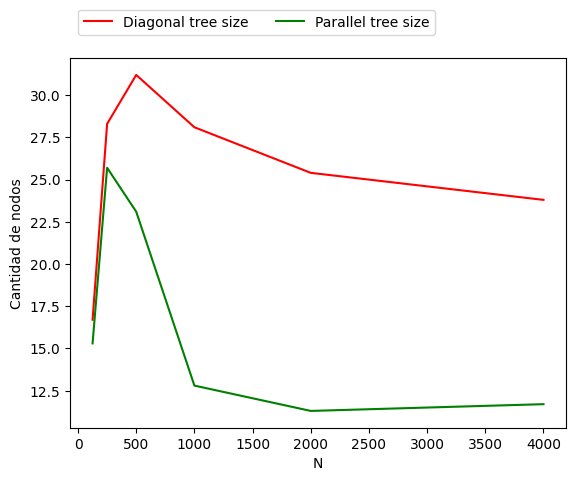

In [85]:
# Armo dataframe con los datos colectados anteriormente
temp_dataframe_d = pd.DataFrame({})
temp_dataframe_d['N'] = train_set_size
temp_dataframe_d['TotalTreeNodes'] = tree_sizes_d

temp_dataframe_p = pd.DataFrame({})
temp_dataframe_p['N'] = train_set_size
temp_dataframe_p['TotalTreeNodes'] = tree_sizes_p

# Dataframes finales a usar para la gráfica
df_nodes_d = pd.DataFrame({})
df_nodes_d['TrainSetSize'] = n_iterable
df_nodes_d['TotalTreeNodes'] = temp_dataframe_d.groupby('N')['TotalTreeNodes'].mean().to_numpy()

df_nodes_p = pd.DataFrame({})
df_nodes_p['TrainSetSize'] = n_iterable
df_nodes_p['TotalTreeNodes'] = temp_dataframe_p.groupby('N')['TotalTreeNodes'].mean().to_numpy()

plt.plot(df_nodes_d['TrainSetSize'], df_nodes_d['TotalTreeNodes'], 'r')
plt.plot(df_nodes_p['TrainSetSize'], df_nodes_p['TotalTreeNodes'], 'g')
plt.legend(['Diagonal tree size', 'Parallel tree size'], bbox_to_anchor=(0.75, 1.15), ncol=2)
plt.xlabel("N")
plt.ylabel("Cantidad de nodos")

Podemos observar que la cantidad de nodos es mayor para los datos diagonales en comparación de los paralelos. También se puede observar que para los datos diagonales, a partir de N ~ 500, la cantidad de nodos comienza a disminuir. Para los datos paralelos, para N ~ 250. Esto puede ser a causa de las ventajas que tiene que se puedan partir los datos con una recta paralela a los ejes.

### Ejercicio 3 y 3.1

Text(0, 0.5, 'Error')

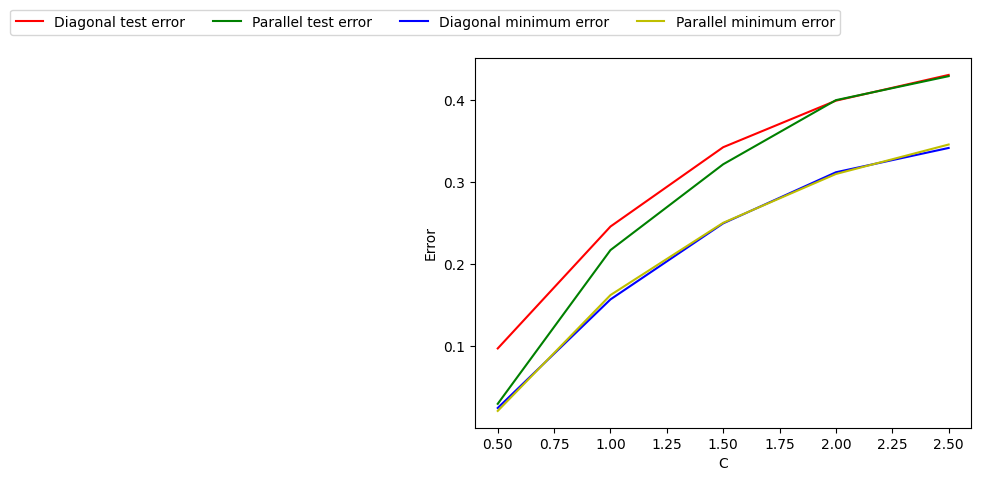

In [91]:
import numpy as np

# Un clasificador «ideal» posible a usar puede ser, dado un punto, calcular su distancia a ambos centros de la distribuciones y devolver la clase de la distribución con centro
# más cercano al punto en cuestión

def ideal_classifier_d(p, d):
    c0 = np.array([-1] * d)
    c1 = np.array([1] * d)
    p_array = np.array(p)
    
    dist_0 = np.linalg.norm(p_array - c0)
    dist_1 = np.linalg.norm(p_array - c1)
    return 0 if dist_0 <= dist_1 else 1

def ideal_classifier_p(p, d):
    c0 = [-1] + ([0] * (d - 1))
    c1 = [1] + ([0] * (d - 1))
    p_array = np.array(p)
    dist_0 = np.linalg.norm(p_array - c0)
    dist_1 = np.linalg.norm(p_array - c1)
    return 0 if dist_0 <= dist_1 else 1

# Valores de c
c_iterable = [0.5, 1, 1.5, 2, 2.5]

# Datos a guardar pedidos
test_errors_d = []
test_errors_p = []

ic_test_errors_d = []
ic_test_errors_p = []

# Guardo el valor que va tomando C para poder armar el dataframe a la hora de analizar
c_values = []

for c in c_iterable:
    # Conjuntos de test
    # Diagonal
    d_test = tp0.generate_dataframe_ej_a(5, 10000, c)
    X_d_test = d_test[[0,1,2,3,4]]
    y_d_test = d_test['Clase']

    points_d = d_test[[0,1,2,3,4]].values.tolist()
    classes_d = d_test[['Clase']]

    # Paralelo
    p_test = tp0.generate_dataframe_ej_b(5, 10000, c)
    X_p_test = p_test[[0,1,2,3,4]]
    y_p_test = p_test['Clase']

    points_p = p_test[[0,1,2,3,4]].values.tolist()
    classes_p = p_test[['Clase']]

    # Predicciones con los clasificadores "ideales"
    ideal_predicted_d = []
    for p in points_d:
        ideal_predicted_d.append(ideal_classifier_d(p,5))

    ideal_predicted_p = []
    for p in points_p:
        ideal_predicted_p.append(ideal_classifier_p(p,5))

    # Errores mínimos
    ic_test_errors_d.append(1 - accuracy_score(ideal_predicted_d, classes_d))
    ic_test_errors_p.append(1 - accuracy_score(ideal_predicted_p, classes_p))

    for i in range(0,20):
        # C usado en estas 20 iteraciones
        c_values.append(c)

        # Conjuntos de entrenamiento diagonal
        train_set_d = tp0.generate_dataframe_ej_a(5, 250, c)
        X_d_train = train_set_d[[0,1,2,3,4]]
        y_d_train = train_set_d['Clase']

        # Conjuntos de entrenamiento paralelo
        train_set_p = tp0.generate_dataframe_ej_b(5, 250, c)
        X_p_train = train_set_p[[0,1,2,3,4]]
        y_p_train = train_set_p['Clase']

        # Arboles y entrenamiento diagonal
        clf_d = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.005,random_state=0,min_samples_leaf=5)
        clf_d.fit(X_d_train, y_d_train)

        # Arboles y entrenamiento paralelo
        clf_p = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.005,random_state=0,min_samples_leaf=5)
        clf_p.fit(X_p_train, y_p_train)

        # Probamos sobre los conjuntos de testeo
        predicted_d = clf_d.predict(d_test[[0,1,2,3,4]])
        predicted_p = clf_p.predict(p_test[[0,1,2,3,4]])

        # Guardamos errores sobre el conjunto de testeo.
        # Error = 1 - accuracy
        test_errors_d.append(1 - accuracy_score(y_d_test, predicted_d))
        test_errors_p.append(1 - accuracy_score(y_p_test, predicted_p))

# Armo dataframe con los datos colectados anteriormente
temp_dataframe_d = pd.DataFrame({})
temp_dataframe_d['C'] = c_values
temp_dataframe_d['TestError'] = test_errors_d

temp_dataframe_p = pd.DataFrame({})
temp_dataframe_p['C'] = c_values
temp_dataframe_p['TestError'] = test_errors_p

# Dataframes finales a usar para la gráfica
df_nodes_d = pd.DataFrame({})
df_nodes_d['C'] = c_iterable
df_nodes_d['TestError'] = temp_dataframe_d.groupby('C')['TestError'].mean().to_numpy()
df_nodes_d['MinError'] = ic_test_errors_d

df_nodes_p = pd.DataFrame({})
df_nodes_p['C'] = c_iterable
df_nodes_p['TestError'] = temp_dataframe_p.groupby('C')['TestError'].mean().to_numpy()
df_nodes_p['MinError'] = ic_test_errors_p

plt.plot(df_nodes_d['C'], df_nodes_d['TestError'], 'r')
plt.plot(df_nodes_p['C'], df_nodes_p['TestError'], 'g')
plt.plot(df_nodes_d['C'], df_nodes_d['MinError'], 'b')
plt.plot(df_nodes_p['C'], df_nodes_p['MinError'], 'y')
plt.legend(['Diagonal test error', 'Parallel test error', 'Diagonal minimum error', 'Parallel minimum error'], bbox_to_anchor=(0.75, 1.15), ncol=4)
plt.xlabel("C")
plt.ylabel("Error")


Se puede observar que mientras mayor superposición haya entre las clases (mayor C), mayor será el error en cualquiera de los 2 casos. Es decir, se observa una sensibilidad notable ante el ruido. Se observa además que los errores mínimos obtenidos son menores a los que obtuvo el árbol, y que el de los datos diagonales coincide con el de los paralelos.

### Ejercicio 4

Text(0, 0.5, 'Error')

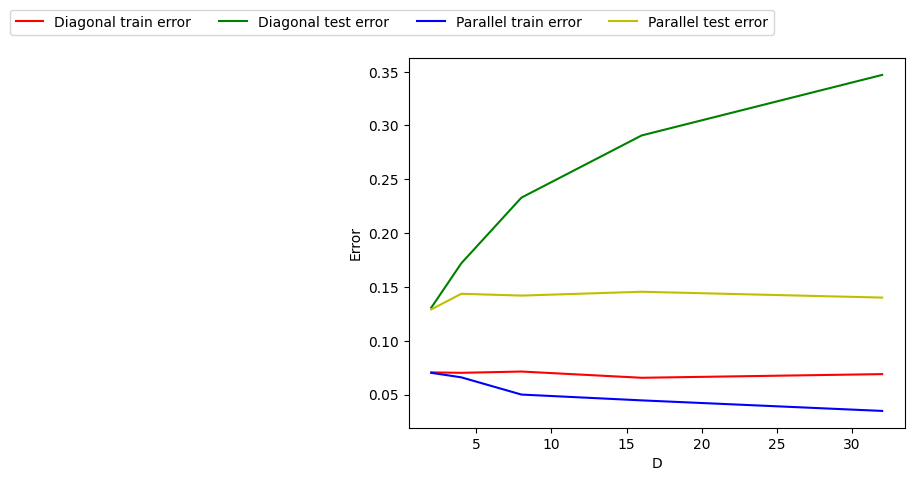

In [110]:
# Valores de d
d_iterable = [2, 4, 8, 16, 32]

# Datos a guardar pedidos
train_errors_d = []
test_errors_d = []

train_errors_p = []
test_errors_p = []

# Guardo la dimension que va teniendo d para poder armar el dataframe a la hora de analizar
dimensions = []

for d in d_iterable:
    # Conjuntos de test
    # Diagonal
    d_test = tp0.generate_dataframe_ej_a(d, 10000, 0.78)
    cols = range(0, d)
    X_d_test = d_test[cols]
    y_d_test = d_test['Clase']

    # Paralelo
    p_test = tp0.generate_dataframe_ej_b(d, 10000, 0.78)
    X_p_test = p_test[cols]
    y_p_test = p_test['Clase']
    
    for i in range(0,20):
        # Longitud del conjunto de entrenamiento
        dimensions.append(d)

        # Conjuntos de entrenamiento diagonal
        train_set_d = tp0.generate_dataframe_ej_a(d, 250, 0.78)
        X_d_train = train_set_d[cols]
        y_d_train = train_set_d['Clase']

        # Conjuntos de entrenamiento paralelo
        train_set_p = tp0.generate_dataframe_ej_b(d, 250, 0.78)
        X_p_train = train_set_p[cols]
        y_p_train = train_set_p['Clase']

        # Arboles y entrenamiento diagonal
        clf_d = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.005,random_state=0,min_samples_leaf=5)
        clf_d.fit(X_d_train, y_d_train)

        # Arboles y entrenamiento paralelo
        clf_p = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.005,random_state=0,min_samples_leaf=5)
        clf_p.fit(X_p_train, y_p_train)

        # Probamos sobre los conjuntos de testeo
        predicted_d = clf_d.predict(d_test[cols])
        predicted_p = clf_p.predict(p_test[cols])

        # Guardamos errores sobre el conjunto de entrenamiento y de testeo.
        # Error = 1 - accuracy
        train_errors_d.append(1 - accuracy_score(y_d_train, clf_d.predict(X_d_train)))
        test_errors_d.append(1 - accuracy_score(y_d_test, predicted_d))

        train_errors_p.append(1 - accuracy_score(y_p_train, clf_p.predict(X_p_train)))
        test_errors_p.append(1 - accuracy_score(y_p_test, predicted_p))

# Armo dataframe con los datos colectados anteriormente
temp_dataframe_d = pd.DataFrame({})
temp_dataframe_d['D'] = dimensions
temp_dataframe_d['TrainError'] = train_errors_d
temp_dataframe_d['TestError'] = test_errors_d

temp_dataframe_p = pd.DataFrame({})
temp_dataframe_p['D'] = dimensions
temp_dataframe_p['TrainError'] = train_errors_p
temp_dataframe_p['TestError'] = test_errors_p

# Dataframes finales a usar para la gráfica
df_errors_d = pd.DataFrame({})
df_errors_d['Dimension'] = d_iterable
df_errors_d['TrainError'] = temp_dataframe_d.groupby('D')['TrainError'].mean().to_numpy()
df_errors_d['TestError'] = temp_dataframe_d.groupby('D')['TestError'].mean().to_numpy()

df_errors_p = pd.DataFrame({})
df_errors_p['Dimension'] = d_iterable
df_errors_p['TrainError'] = temp_dataframe_p.groupby('D')['TrainError'].mean().to_numpy()
df_errors_p['TestError'] = temp_dataframe_p.groupby('D')['TestError'].mean().to_numpy()

plt.plot(df_errors_d['Dimension'], df_errors_d['TrainError'], 'r')
plt.plot(df_errors_d['Dimension'], df_errors_d['TestError'], 'g')
plt.plot(df_errors_p['Dimension'], df_errors_p['TrainError'], 'b')
plt.plot(df_errors_p['Dimension'], df_errors_p['TestError'], 'y')
plt.legend(['Diagonal train error', 'Diagonal test error', 'Parallel train error', 'Parallel test error'], bbox_to_anchor=(0.75, 1.15), ncol=4)
plt.xlabel("D")
plt.ylabel("Error")

Se puede observar que para dimensiones pequeñas, el error de training es parecido al de testing. Sin embargo, mientras más dimensiones haya, mayor es esta brecha. Para el caso paralelo esto no se observa tanto por la simplicidad que tiene el modelo para particionarlo con rectas paralelas al eje, pero en el caso del diagonal el error de test crece de manera bastante acelerada cuando la dimensión crece.

### Ejercicio 5

<AxesSubplot:xlabel='x', ylabel='y'>

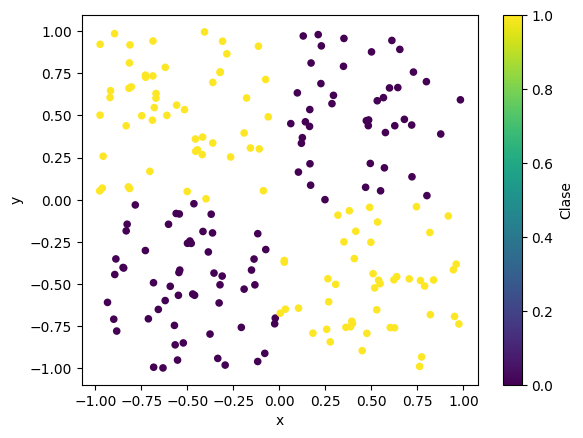

In [113]:
cols = ['x', 'y', 'Clase']
dataframe = pd.read_csv('xor.csv', names=cols)

dataframe.plot(x=0, y=1, kind='scatter', c='Clase', colormap='viridis')

Un árbol que divide a los datos correctamente en sus clases podría ser el siguiente:

![xor_tree](./tree_xor_2.png)

Pasamos ahora a generar un árbol de decisión en python:

[Text(0.5, 0.5, 'entropy = 1.0\nsamples = 200\nvalue = [100, 100]')]

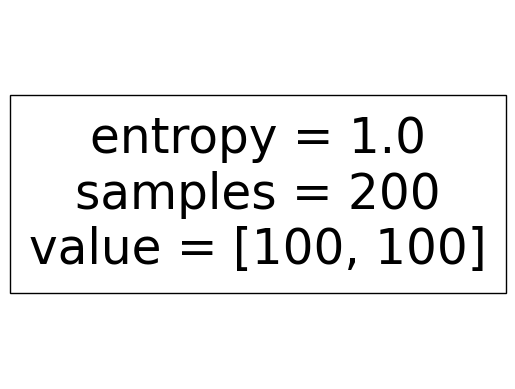

In [114]:
clf = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.03,random_state=0,min_samples_leaf=5)
clf.fit(dataframe[['x','y']], dataframe['Clase'])

tree.plot_tree(clf)

Podemos ver que el árbol generado por python nos devuelve una única hoja con máxima entropía. Con lo cual, este problema no tiene solución utilizando este modelo; ya que no se puede trazar una recta que particione a los datos en sus correspondientes clases (aquí vendran las redes al rescate en el futuro).